# Abalone DataSet

In [39]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('Abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [41]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [42]:
df = pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
df.shape

(4177, 9)

In [44]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

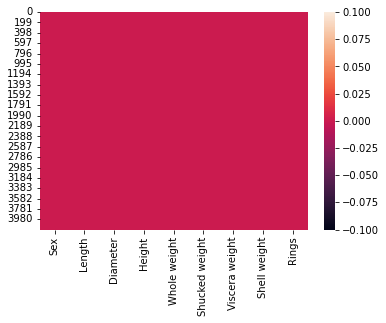

In [45]:
sb.heatmap(df.isnull())

In [46]:

le = LabelEncoder()

# if we have to change single column use as below
df['Sex'] = le.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Checking the outliers:

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

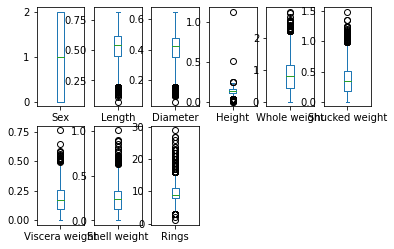

In [47]:
df.plot(kind='box', subplots = True,layout = (2,6) )

obs: Outliers are present in data as we can see from above graph

In [48]:
from scipy.stats import skew

Sex
-0.09811989796728826


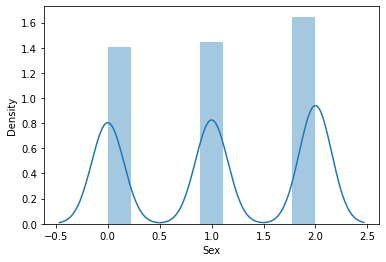

Length
-0.6396434615451078


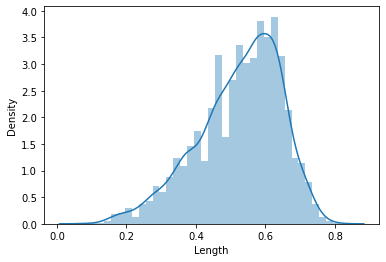

Diameter
-0.6089793517180232


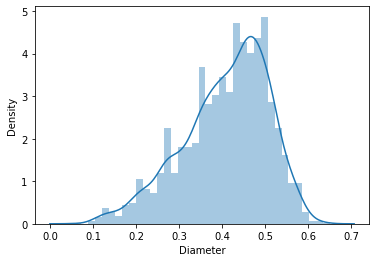

Height
3.127693679207538


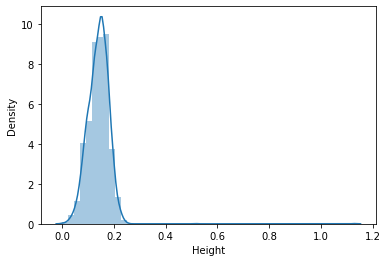

Whole weight
0.5307678720133928


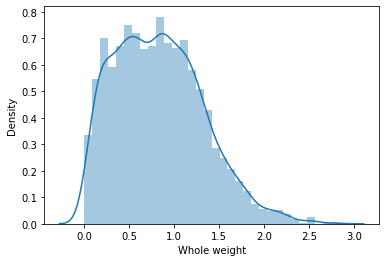

Shucked weight
0.7188396611678955


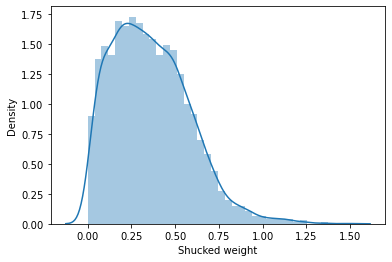

Viscera weight
0.5916395905344537


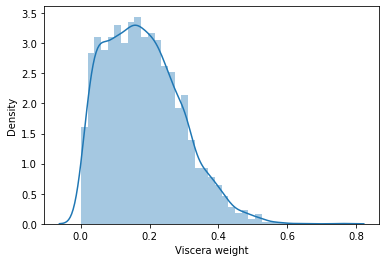

Shell weight
0.6207038222275745


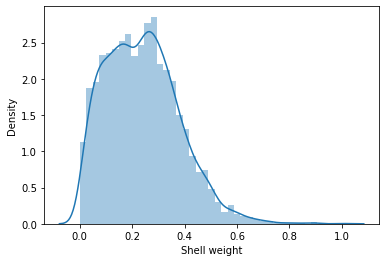

Rings
1.1137017739656028


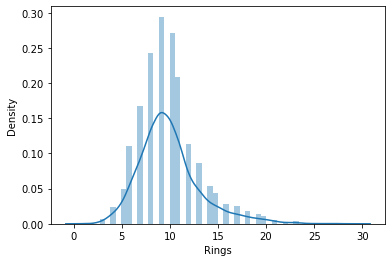

In [49]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sb.distplot(df[col])
    plt.show()
    


observstion :
    All columns of the data is mostly skewed.

In [50]:
#checking correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

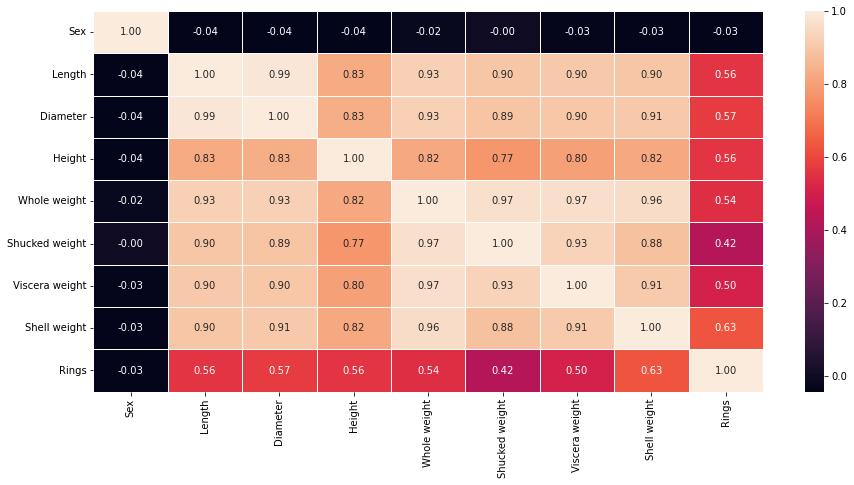

In [51]:
plt.figure(figsize=(15,7))
sb.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="white",fmt='0.2f')       #plotting heatmap of correlation

In [52]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [54]:
x = df.iloc[:,:-1]

In [55]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
#Checking multicollinearity

def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [57]:
calc_vif(x)

,variables,VIF FACTOR
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


obs: No column can be dropped as we need every column to predict the age by rings

In [58]:
# Removing Outliers
from scipy.stats import zscore
z = np.array(abs(zscore(df)))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [59]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [60]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [61]:
#removing duplicate values
df_new.drop_duplicates(keep='first',inplace=True)

In [62]:
df_new.shape

(4027, 9)

In [63]:
df.shape

(4177, 9)

In [64]:
loss_percent = ((4177-4027)/4177)*100
loss_percent

3.5910940866650707

data loss is less than 5% so we can proceed

In [65]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [66]:
# removing skewness as shucked weight is badly correlated with ouput 

df_new['Shucked weight']= np.sqrt(df_new['Shucked weight'])


In [67]:
skew(df_new['Shucked weight'])

-0.22625196103213183

In [68]:
df_new['Height']= np.sqrt(df_new['Height'])    #removed skewness as it was mediumly correlated and had high skewness
skew(df_new['Height'])

-0.6532410749651459

Data is now cleaned

Splitting the data

In [69]:
x= df_new.iloc[:,0:-1]
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.473814,0.1010,0.150
1,2,0.350,0.265,0.300000,0.2255,0.315436,0.0485,0.070
2,0,0.530,0.420,0.367423,0.6770,0.506458,0.1415,0.210
3,2,0.440,0.365,0.353553,0.5160,0.464220,0.1140,0.155
4,1,0.330,0.255,0.282843,0.2050,0.299166,0.0395,0.055


In [70]:
y = df_new['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [71]:
# Standardization of the data
scalar= StandardScaler()
x=scalar.fit_transform(x)
y=scalar.fit_transform(y.values.reshape(-1,1))

In [76]:
from sklearn.preprocessing import MinMaxScaler
mns= MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.4925406740547994
At random state 0,the testing accuracy is:- 0.4642981752222055


At random state 1,the training accuracy is:- 0.49258030950482234
At random state 1,the testing accuracy is:- 0.46156069380160203


At random state 2,the training accuracy is:- 0.4891770848923159
At random state 2,the testing accuracy is:- 0.4795898989474664


At random state 3,the training accuracy is:- 0.4902901814900623
At random state 3,the testing accuracy is:- 0.4732359036245948


At random state 4,the training accuracy is:- 0.48637661234097307
At random state 4,the testing accuracy is:- 0.4902378547818782


At random state 5,the training accuracy is:- 0.49656271189295864
At random state 5,the testing accuracy is:- 0.4492897892364982


At random state 6,the training accuracy is:- 0.4828981882183774
At random state 6,the testing accuracy is:- 0.5029726475671749


At random state 7,the training accuracy is:- 0.4983610077219316
At random state 7,the testing

At random state 73,the testing accuracy is:- 0.4966987302882928


At random state 74,the training accuracy is:- 0.4834199763032332
At random state 74,the testing accuracy is:- 0.4996618255325601


At random state 75,the training accuracy is:- 0.4906048254891181
At random state 75,the testing accuracy is:- 0.4738115208633952


At random state 76,the training accuracy is:- 0.4874288018061135
At random state 76,the testing accuracy is:- 0.4854832030577235


At random state 77,the training accuracy is:- 0.48838192268843383
At random state 77,the testing accuracy is:- 0.4819620020819475


At random state 78,the training accuracy is:- 0.4879539140384662
At random state 78,the testing accuracy is:- 0.4815520665849955


At random state 79,the training accuracy is:- 0.4826491846710066
At random state 79,the testing accuracy is:- 0.504647863016568


At random state 80,the training accuracy is:- 0.4843550311692736
At random state 80,the testing accuracy is:- 0.49787881201065665


At random state 

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.28, random_state=62)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

# here we are using two parameter but it is mandatory to use atleast 4 parameters
rf = RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [91]:
rfr=RandomForestRegressor(criterion="mae",max_features="sqrt")

In [92]:
for i in range(1,100):
    x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20, random_state=i)
    
    rfr.fit(x_train, y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)

accuracy of the model 0.5383149949119647 random_state 1
accuracy of the model 0.5459588176673542 random_state 2
accuracy of the model 0.5144862936200212 random_state 3
accuracy of the model 0.568306577626966 random_state 4
accuracy of the model 0.522022719707588 random_state 5
accuracy of the model 0.566403506388867 random_state 6
accuracy of the model 0.515054181055345 random_state 7
accuracy of the model 0.5764575582469662 random_state 8
accuracy of the model 0.5683870159018147 random_state 9
accuracy of the model 0.5661959516887863 random_state 10
accuracy of the model 0.5761024255098945 random_state 11
accuracy of the model 0.5742483700068044 random_state 12
accuracy of the model 0.5519823696036708 random_state 13
accuracy of the model 0.5384521649602424 random_state 14
accuracy of the model 0.5733906498816004 random_state 15
accuracy of the model 0.5452361828103787 random_state 16
accuracy of the model 0.5163396974232707 random_state 17
accuracy of the model 0.5815934621075438 ran

In [93]:
import pickle
filename= 'abalone.pkl'
pickle.dump(rfr,open(filename, 'wb'))

In [94]:
loaded_model = pickle.load(open('abalone.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

56.25995613738324


In [95]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], pred[:]], index=["Predicted", "Orignal"])

In [96]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
Predicted,-0.327742,-0.949178,-0.097322,-0.621004,0.227361,0.45778,-0.771126,0.422868,0.171501,-1.231966,...,-0.865389,-1.252913,0.852287,-0.401058,0.901164,-0.826985,-0.540706,0.265764,-0.875862,0.258781
Orignal,-0.327742,-0.949178,-0.097322,-0.621004,0.227361,0.45778,-0.771126,0.422868,0.171501,-1.231966,...,-0.865389,-1.252913,0.852287,-0.401058,0.901164,-0.826985,-0.540706,0.265764,-0.875862,0.258781
